In [1]:
!pip install transformers

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import transformers
import numpy as np

In [9]:
# path_data_origin = '/Users/neath/Documents/ParaphraseDetection2/data/clean_data/no/no_original_concat.txt'
path_data_origin = '~/Documents/tordetect/data/clean_data/no/no_original_concat.txt'
path_data_tortured = '~/Documents/tordetect/data/clean_data/yes/yes_concat.txt'
data_origin = pd.read_csv(path_data_origin, sep='\t', header=None)
data_origin.columns = ['status','none','para']
data_origin
data_tortured = pd.read_csv(path_data_tortured, sep='\t', header=None)
data_tortured.columns = ['status','index_id','para','tortured_phrases','expected_phrases']
data_tortured

status  index_id                                               para  \
0       yes      2198   . Triple Bottom Line TBL Triple Bottom Line i...   
1       yes      1747   This document discusses yet another aspect; G...   
2       yes      1867   In most runs an intial population was chosen ...   
3       yes      2499   The particular proposed RAN is definitely an ...   
4       yes      5244   A further check of the redshift evaluation pr...   
...     ...       ...                                                ...   
1698    yes    101623   Flight Unlimited was simply the main distribu...   
1699    yes    102109  Starting at , the Larrys Creek watershed is . ...   
1700    yes    102247  In uncommon cases, beagles may create safe int...   
1701    yes    102272  Matter is made out of such things as particles...   
1702    yes    102418  A portion of the chemicals appearing most asto...   

                   tortured_phrases  \
0              vitality utilization   
1              hereditary algorithm   
2              hereditary algorithm   
3       convolutional neural system   
4                      blunder rate   
...                             ...   
1698  computational liquid elements   
1699         corrosive mine seepage   
1700         invulnerable framework   
1701                 motor vitality   
1702                   blunder rate   

                                     expected_phrases  
0                                          energy use  
1     genetic algorithm (beware FP 10.1109/78.485931)  
2     genetic algorithm (beware FP 10.1109/78.485931)  
3                  convolutional neural network (CNN)  
4                                          error rate  
...                                               ...  
1698                     computational fluid dynamics  
1699                             acidic mine drainage  
1700                                    immune system  
1701                                   kinetic energy  
1702                                       error rate  

[1703 rows x 5 columns]

In [ ]:
# concatenating df1 and df2 along rows
data = pd.concat([data_origin, data_tortured], axis=0)
# shuffle the DataFrame rows
data = data.sample(frac = 1)
data = data[['status','para','tortured_phrases','expected_phrases']]
# replace label by number
data['status']=data['status'].replace(to_replace="yes",value=1)
data['status']=data['status'].replace(to_replace="no",value=0)
set(data['status'])

{0, 1}

In [ ]:
# data for the training and testing
x_train, x_test, y_train, y_test = train_test_split(data['para'], data['status'], test_size=0.33, random_state=42)
x_train = list(x_train)
x_test = list(x_test)
y_train = list(y_train)
y_test = list(y_test)

In [ ]:
x_train[1]

'The JWP distributed its report on components and out of . It perceived the JINR LLNL joint effort as having found components and , however did not acknowledge either group s case to component and did not acknowledge the JINR LLNL cases to components and . The JINR LLNL guarantee to components and had been established on synthetic recognizable proof of their girl dubnium, yet the JWP protested that present hypothesis couldn t recognize amass and gathering components by their concoction properties with enough certainty to permit this task. The rot properties of the considerable number of cores in the rot chain of component had not been recently described before the JINR tests, a circumstance which the JWP for the most part considers troublesome, yet not really selective , and with the modest number of molecules created with neither known little girls nor cross responses the JWP thought about that their criteria had not been satisfied. The JWP did not acknowledge the Riken group s case e

In [ ]:
## TOKENISATION

from transformers import DistilBertTokenizer, AutoTokenizer

MAX_LEN = 100

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', padding=True, truncation=True)
# BASE_MODEL = "distilbert-base-multilingual-cased"
# tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
# tokenizer_out = tokenizer("Hello, my dog is cute")
# tokenizer_out

# let's check out how the tokenizer works

# for n in range(len(x_train)):
for n in range(5):
    # tokenize forum post
    tokenizer_out = tokenizer(x_train[n])
    # convert numerical tokens to alphabetical tokens
    encoded_tok = tokenizer.convert_ids_to_tokens(tokenizer_out.input_ids)
    # decode tokens back to string
    decoded = tokenizer.decode(tokenizer_out.input_ids)
    print(tokenizer_out)
    print(encoded_tok, '\n')
    print(decoded, '\n')
    print('---------------- \n')


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

{'input_ids': [101, 2004, 1997, 1996, 2142, 2163, 2883, 2045, 2020, 1010, 3633, 1010, 1010, 2945, 1010, 1998, 1010, 2945, 2542, 1999, 1996, 2103, 1012, 1996, 22508, 14983, 2001, 1012, 3633, 2566, 2675, 3542, 1012, 2463, 1012, 2045, 2020, 1010, 26859, 3197, 2012, 1037, 3671, 14983, 1997, 1012, 2566, 2675, 3542, 1012, 2463, 1012, 1996, 5762, 25381, 1997, 1996, 2103, 2001, 1012, 2317, 1010, 1012, 3060, 2137, 1010, 1012, 3128, 2137, 1010, 1012, 4004, 1010, 1012, 3534, 12544, 1010, 1012, 2013, 2367, 3837, 1010, 1998, 1012, 2013, 2012, 2560, 2048, 3837, 1012, 6696, 2030, 7402, 1997, 2151, 2679, 2020, 1012, 1997, 1996, 22508, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'as', 'of', 'the', 'un

In [ ]:
from torch.utils.data import Dataset, DataLoader

MAX_LEN = 512

class PostsDataset(Dataset):
    def __init__(self, posts, labels, tokenizer, max_len):
        # variables that are set when the class is instantiated
        self.posts = posts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.posts)

    def __getitem__(self, item):
        # select the post and its category
        post = str(self.posts[item])
        label = self.labels[item]
        # tokenize the post
        tokenizer_out = self.tokenizer(
            post,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
            )
        # return a dictionary with the output of the tokenizer and the label
        return  {
            'input_ids': tokenizer_out['input_ids'].flatten(),
            'attention_mask': tokenizer_out['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# instantiate two PostsDatasets
train_dataset = PostsDataset(x_train, y_train, tokenizer, MAX_LEN)
test_dataset = PostsDataset(x_test, y_test, tokenizer, MAX_LEN)


In [ ]:
train_dataset[1]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0

In [ ]:
## MODEL

from transformers import DistilBertModel

PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'

distilbert = DistilBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

first_post = train_dataset[0]

hidden_state = distilbert(
    input_ids=first_post['input_ids'].unsqueeze(0), attention_mask=first_post['attention_mask'].unsqueeze(0)
    )

print(hidden_state[0].shape)

print(distilbert.config)


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the b

torch.Size([1, 512, 768])
DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.17.0",
  "vocab_size": 30522
}



In [ ]:

from transformers import DistilBertPreTrainedModel, DistilBertConfig

PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'

class DistilBertForPostClassification(DistilBertPreTrainedModel):
    def __init__(self, config, num_labels, freeze_encoder=False):
        # instantiate the parent class DistilBertPreTrainedModel
        super().__init__(config)
        # instantiate num. of classes
        self.num_labels = num_labels
        # instantiate and load a pretrained DistilBERT model as encoder
        self.encoder = DistilBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        # freeze the encoder parameters if required (Q1)
        if freeze_encoder:
          for param in self.encoder.parameters():
              param.requires_grad = False
        # the classifier: a feed-forward layer attached to the encoder's head
        self.classifier = torch.nn.Linear(
            in_features=config.dim, out_features=self.num_labels, bias=True)
        # in_features = 768, out_features = 4

        # instantiate a dropout function for the classifier's input
        self.dropout = torch.nn.Dropout(p=0.1)

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
    ):
        # encode a batch of sequences with DistilBERT
        encoder_output = self.encoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
        )
        # extract the hidden representations from the encoder output
        hidden_state = encoder_output[0]  # (bs, seq_len, dim)
        # only select the encoding corresponding to the first token
        # of each sequence in the batch (Q2)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        # apply dropout
        pooled_output = self.dropout(pooled_output)  # (bs, dim)
        # feed into the classifier
        logits = self.classifier(pooled_output)  # (bs, dim)

        outputs = (logits,) + encoder_output[1:]

        if labels is not None: # (Q3)
          # instantiate loss function
          # SOLUTION :
          loss_fct = torch.nn.CrossEntropyLoss()
          # calculate loss
          # SOLUTION :
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
          # aggregate outputs
          outputs = (loss,) + outputs

        return outputs  # (loss), logits, (hidden_states), (attentions)

Train First Model:

In [ ]:
# instantiate model
model = DistilBertForPostClassification(
    config=distilbert.config, num_labels=len(set(data['status'])), freeze_encoder = True
    )

# print info about model's parameters
total_params = sum(p.numel() for p in model.parameters())
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
trainable_params = sum([np.prod(p.size()) for p in model_parameters])
trainable_params

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1538

In [ ]:
## TRAINING

from transformers import Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',
    logging_first_step=True,
    logging_steps=50,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    learning_rate=5e-5,

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    compute_metrics=compute_metrics
)

train_results = trainer.train()
test_results = trainer.predict(test_dataset=test_dataset)

print('Predictions: \n', test_results.predictions)
print('\nAccuracy: ', test_results.metrics['test_accuracy'])
print('Precision: ', test_results.metrics['test_precision'])
print('Recall: ', test_results.metrics['test_recall'])
print('F1: ', test_results.metrics['test_f1'])
# print(set(data['status']))

MODEL_PATH = './my_model'
trainer.save_model(MODEL_PATH)



PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 2258
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2830
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated

Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_ma

Saving model checkpoint to ./my_model
Configuration saved in ./my_model/config.json


Predictions: 
 [[ 1.0908883  -1.9277577 ]
 [ 1.1153793  -1.9199998 ]
 [ 0.49411383 -1.2514265 ]
 ...
 [-1.3282647   0.5939964 ]
 [-0.78811646  0.05592212]
 [ 0.8004714  -1.485727  ]]

Accuracy:  0.8643306379155435
Precision:  [0.82024169 0.92904656]
Recall:  [0.94434783 0.77881041]
F1:  [0.87793048 0.84732053]


Model weights saved in ./my_model/pytorch_model.bin


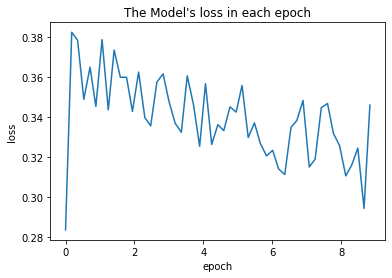

In [ ]:
import matplotlib.pyplot as plt
import json
# Opening JSON file
f = open('results/checkpoint-2500/trainer_state.json')
# returns JSON object as
# a dictionary
data = json.load(f)
# Iterating through the json
x = [i['epoch'] for i in data["log_history"]]
y = [i['loss'] for i in data["log_history"]]

plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(x, y)
plt.title("The Model's loss in each epoch")
# Closing file
f.close()